<h1 align="center"> Operações unitárias 3

<img align="center" width="150%" src="http://labvirtual.eq.uc.pt/siteJoomla/images/stories/membranas1.png" >


---

<h1 align="center"> Introdução

<h1> # Introdução

O escoamento em meios porosos é um tema comum na disciplina de Operações Unitárias III, que estuda a transferência de massa e energia nos meios porosos, como areias, rochas e solos. Os meios porosos são materiais compostos de uma matriz sólida e de poros interconectados que contêm fluidos.

Algumas das principais aplicações do escoamento em meios porosos incluem:

- **Prospecção de petróleo e gás**: ajuda a identificar as jazidas de petróleo e gás subterrâneos.
- **Proteção ambiental**: é utilizado para modelar o transporte de contaminantes em solos e rochas.
- **Gerenciamento de água subterrânea**: é utilizado para o gerenciamento de recursos hídricos subterrâneos, como aquíferos.
- **Processos geotérmicos**: ajuda a prever a taxa de transferência de calor e massa em sistemas geotérmicos.
- **Tratamento de resíduos**: é utilizado para modelar o transporte de resíduos tóxicos em aterros sanitários.

Desse modo, nosso principal objetivo será estabelecer uma relação entre **Queda de pressão x Vazão**.

---

<h1 align="center"> Escoamento

<h1> # Modelagem

Considere a figura abaixo:

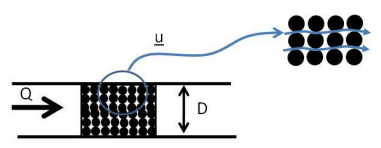

Define as seguintes grandezas: (**$\varepsilon$**: Porosidade)

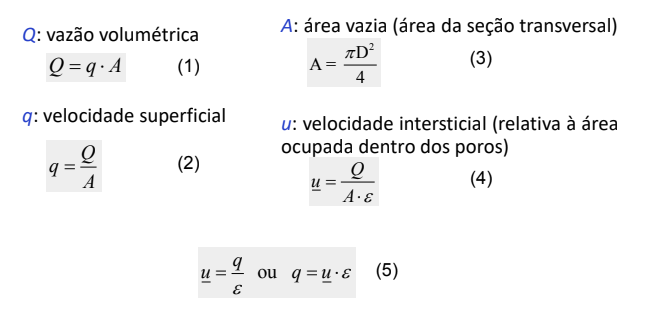

Aplicando a **equação da continuidade** e a **equação do movimento** para o sistema acima, temos:

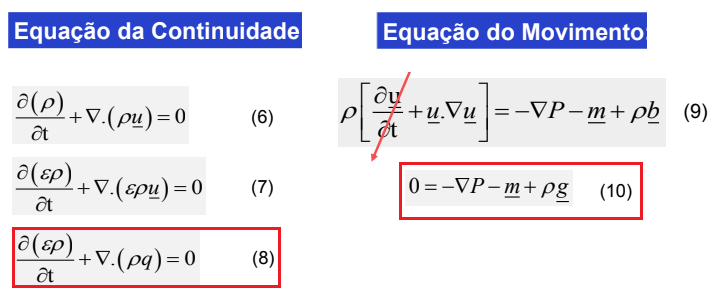

- Onde:

- **p**: Densidade do fluido
- **b**: Intensidade da força de campo (g)
- **m**: Força resistiva (força exercida pelo fluido sobre a matriz porosa por unidade de volume do meio poroso.

<h1> # Força resistiva

A **força resistiva**, também conhecida como força de resistência ou força de arrasto, é uma força que age contra o movimento de um objeto atravessando um meio fluido, como o ar ou a água. Além disso, ela pode ser causada pelo movimento do fluido atravessando um objeto fixo.

A força resistiva para o movimento do fluido através de uma matriz porosa é representada por:

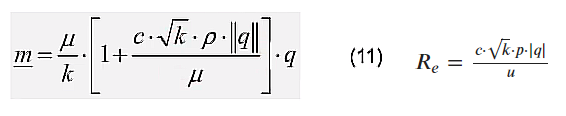

Onde:

- **K**: Permeabilidade do meio poroso
- **c**: Parâmetro adimensional que depende da matriz porosa
- $R_e$: Reynolds para escoamento poroso


Ademais, para escoamentos lentos, onde $R_e$ << 1, temos que a equação se simplifica e encontramos a **lei de darcy**:

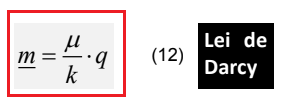

<h1> # Escoamento Darciano

Para escoamentos lentos temos a simplificação da força resistiva, **lei de darcy**, desse modo aplicando a equação do movimento:

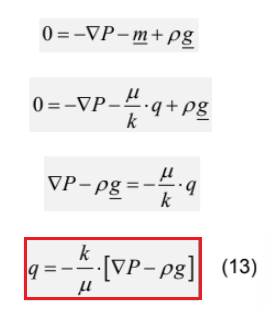

<h1> # Escoamento Darciano: Escoamentos verticais

Para escoamentos verticais é necessário se levar em consideração a variação de pressão com relação ao eixo y. Considere a seguinte figura:

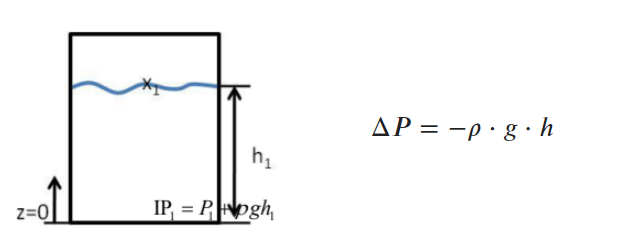


Considerando que:

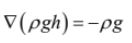

Então:

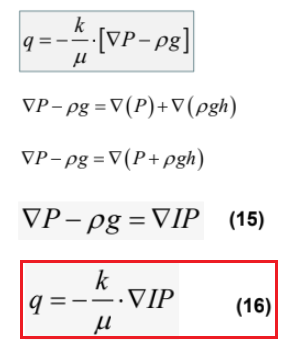

<h1> # [ 1 ] Perda de carga: Escoamento incompressível

Para calcularmos a perda de carga em um escoamento incompressivel, considere a figura abaixo:

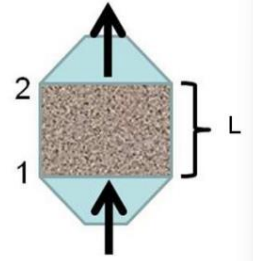

Iremos aplicar a **Equação de Bernoulli** para determinar a perda de carga:

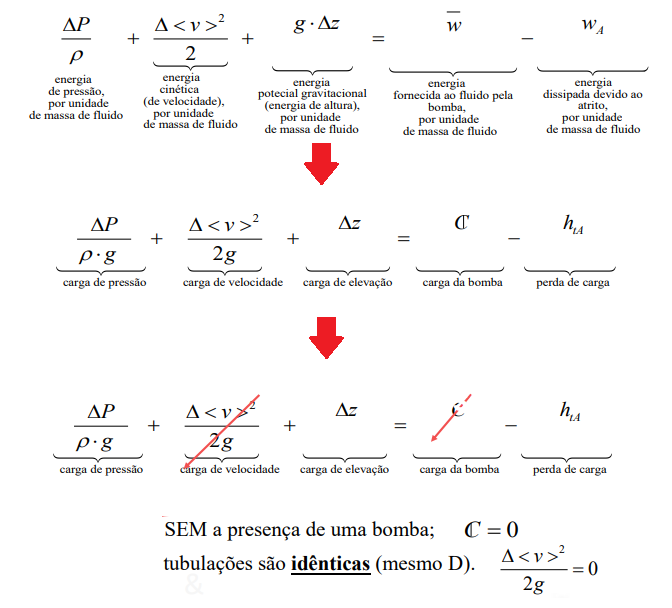

Desse modo, chegamos em:

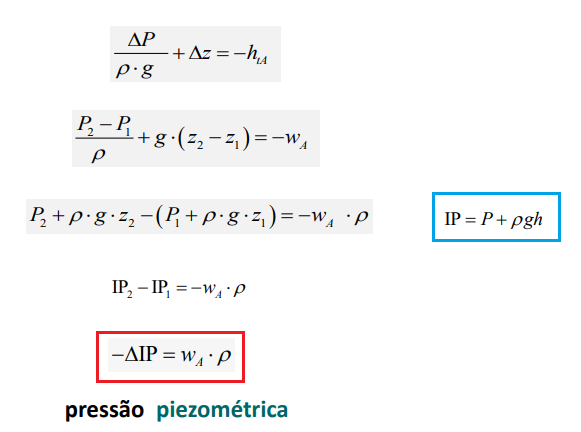

<h1> # [ 2 ] Perda de carga: Escoamento incompressível

Considerando a **variação de pressão piezométrica** e aplicando a equação do movimento para o escoamento incompressíel:

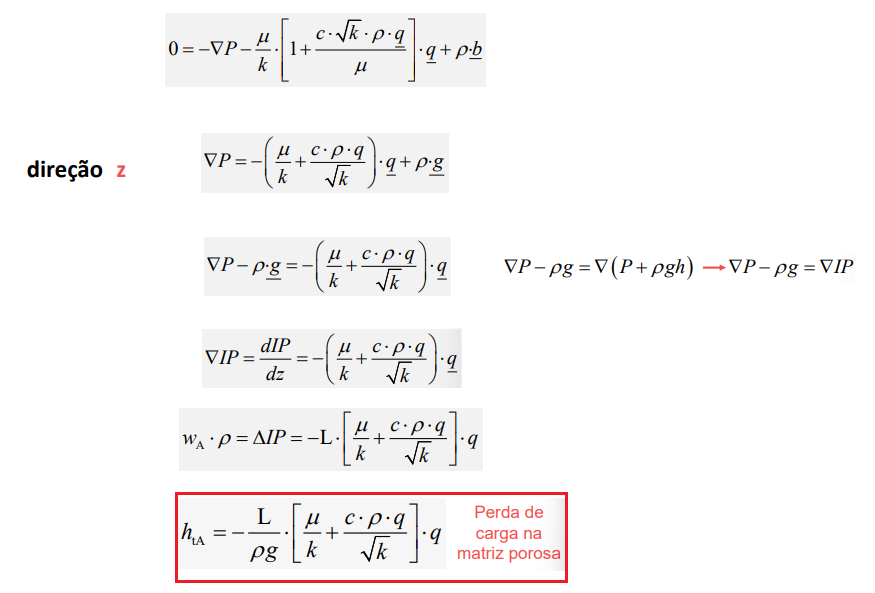

---

<h1 align="center"> Matriz porosa

<h1> # Matriz porosa: Porosidade ($\varepsilon$)

Para determinação da porosidade em uma matriz porosa, utilizamos:

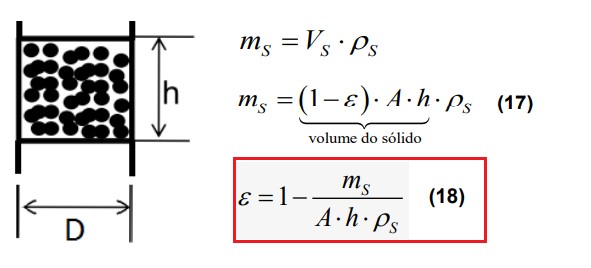

<h1> # Matriz porosa: Permeabilidade em escoamento incompressivel ($k$) 

Para a determinação da permeabilidade de uma matriz porosa, em um escoamento incompressivel, utiliza-se os seguinte experimento prático:

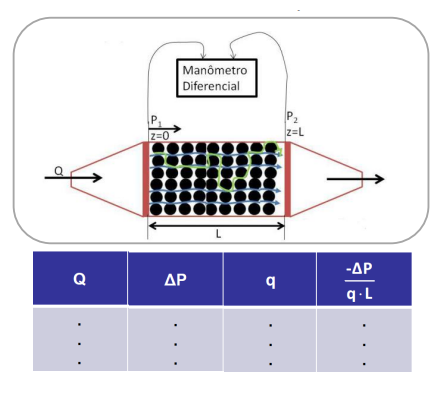

Aplicando a equação do movimento:

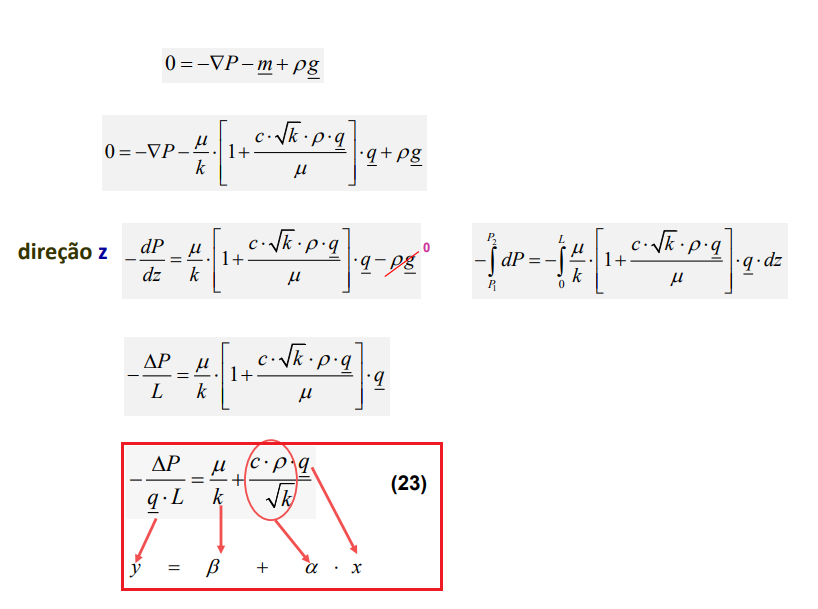

Abrindo a expressão chegamos em uma equação da reta, que pode ser ajustada aos dados experimentais e consequentemente obtendo os parâmetros de permeabilidade **k** e a constante adimensional **c**:

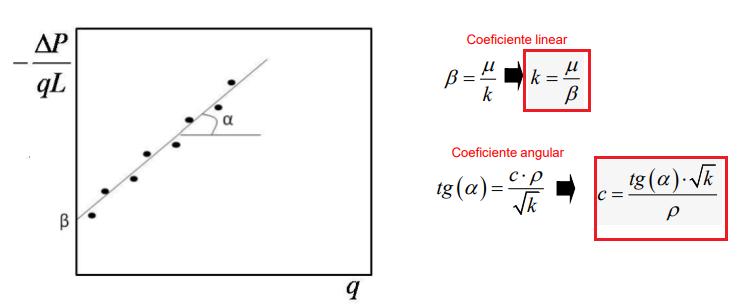

<h1> # Matriz porosa: Permeabilidade em escoamento isotérmico de um gás compressivel ($k$) 

Para a determinação da permeabilidade de uma matriz porosa, em um escoamento incompressivel, utiliza-se os seguinte experimento prático:

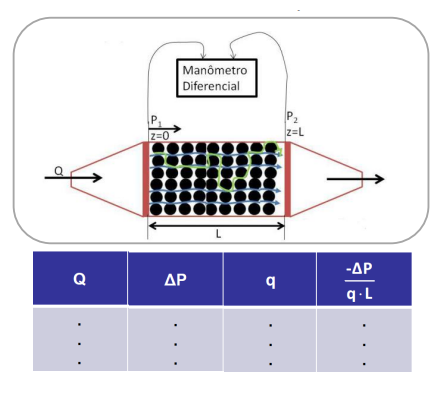

Aplicando a equação do movimento:

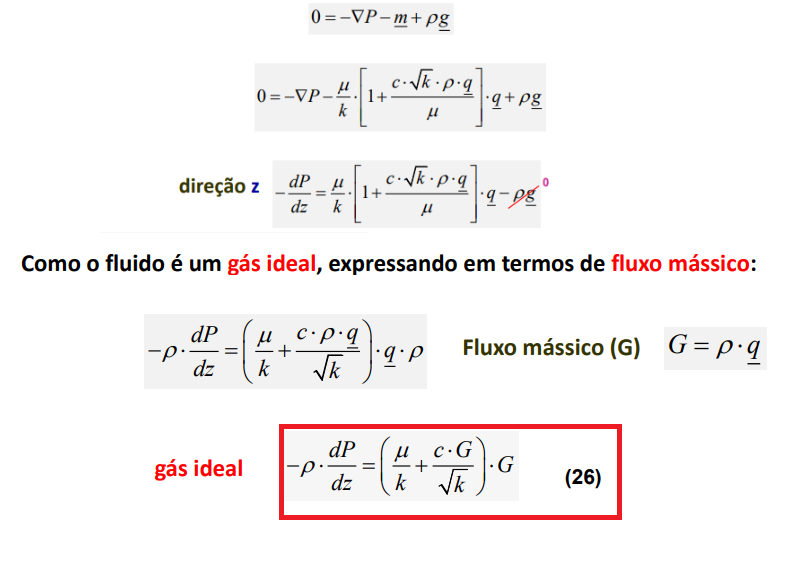

- **Observação**: A densidade do gás respeita a equação do gás ideal.

<h1> # Matriz porosa: Permeabilidade correlações empiricas ($k$) 

Além dos métodos analiticos para determinar a **permeabilidade (k)** existem os métodos empiricos.

Desse modo, tratando-se o meio poroso como um feixe de dutos, podemos utilizar a correlação de **Kozeny-Carman**:

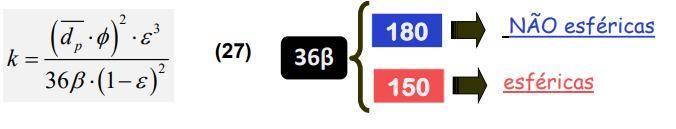

Além disso, existem diversas outras correlações:

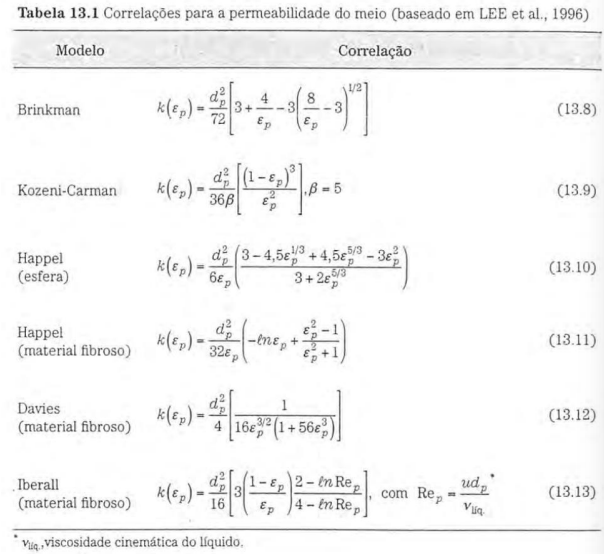

<h1> # Matriz porosa: Parâmetro adimensional ($c$) 

Para se estimar o parâmetro adimensional **c** é possivel utilizar algumas correlações:

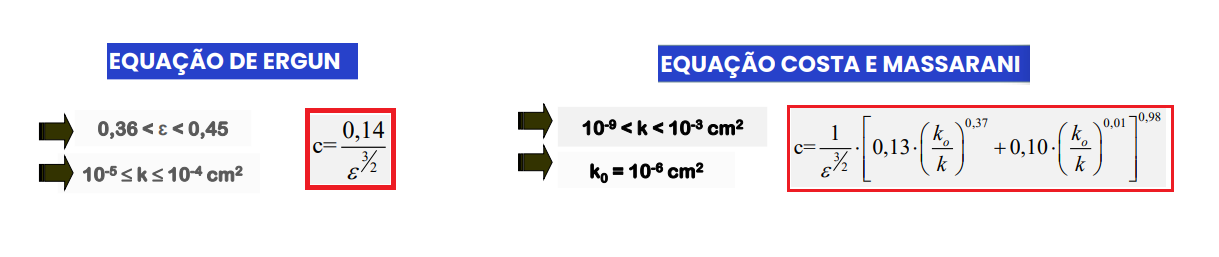

Aplicando a **equação do movimento**, com **c** obtido pela **equação de Ergun** e **k** obtido pela **correlação de Kozeny-Carman**:

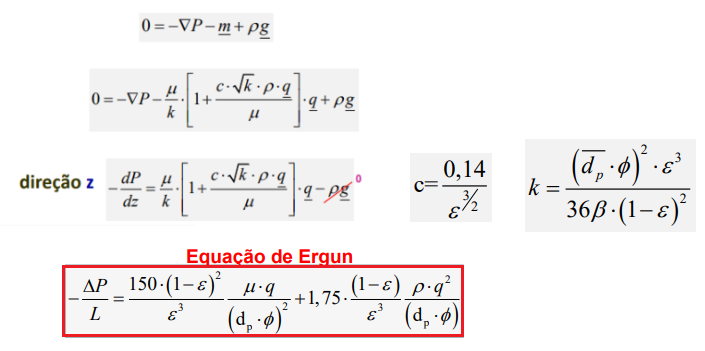

<h1> # Exemplo: Potencia de bomba

- Questão:

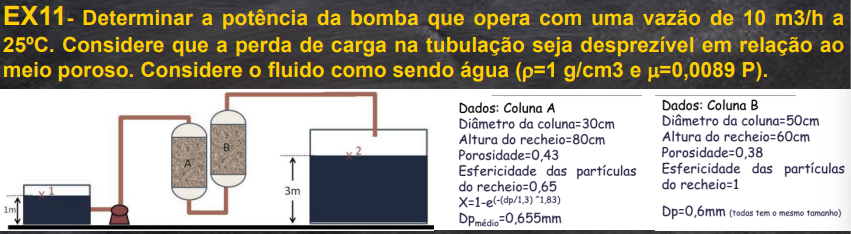

- Resposta:

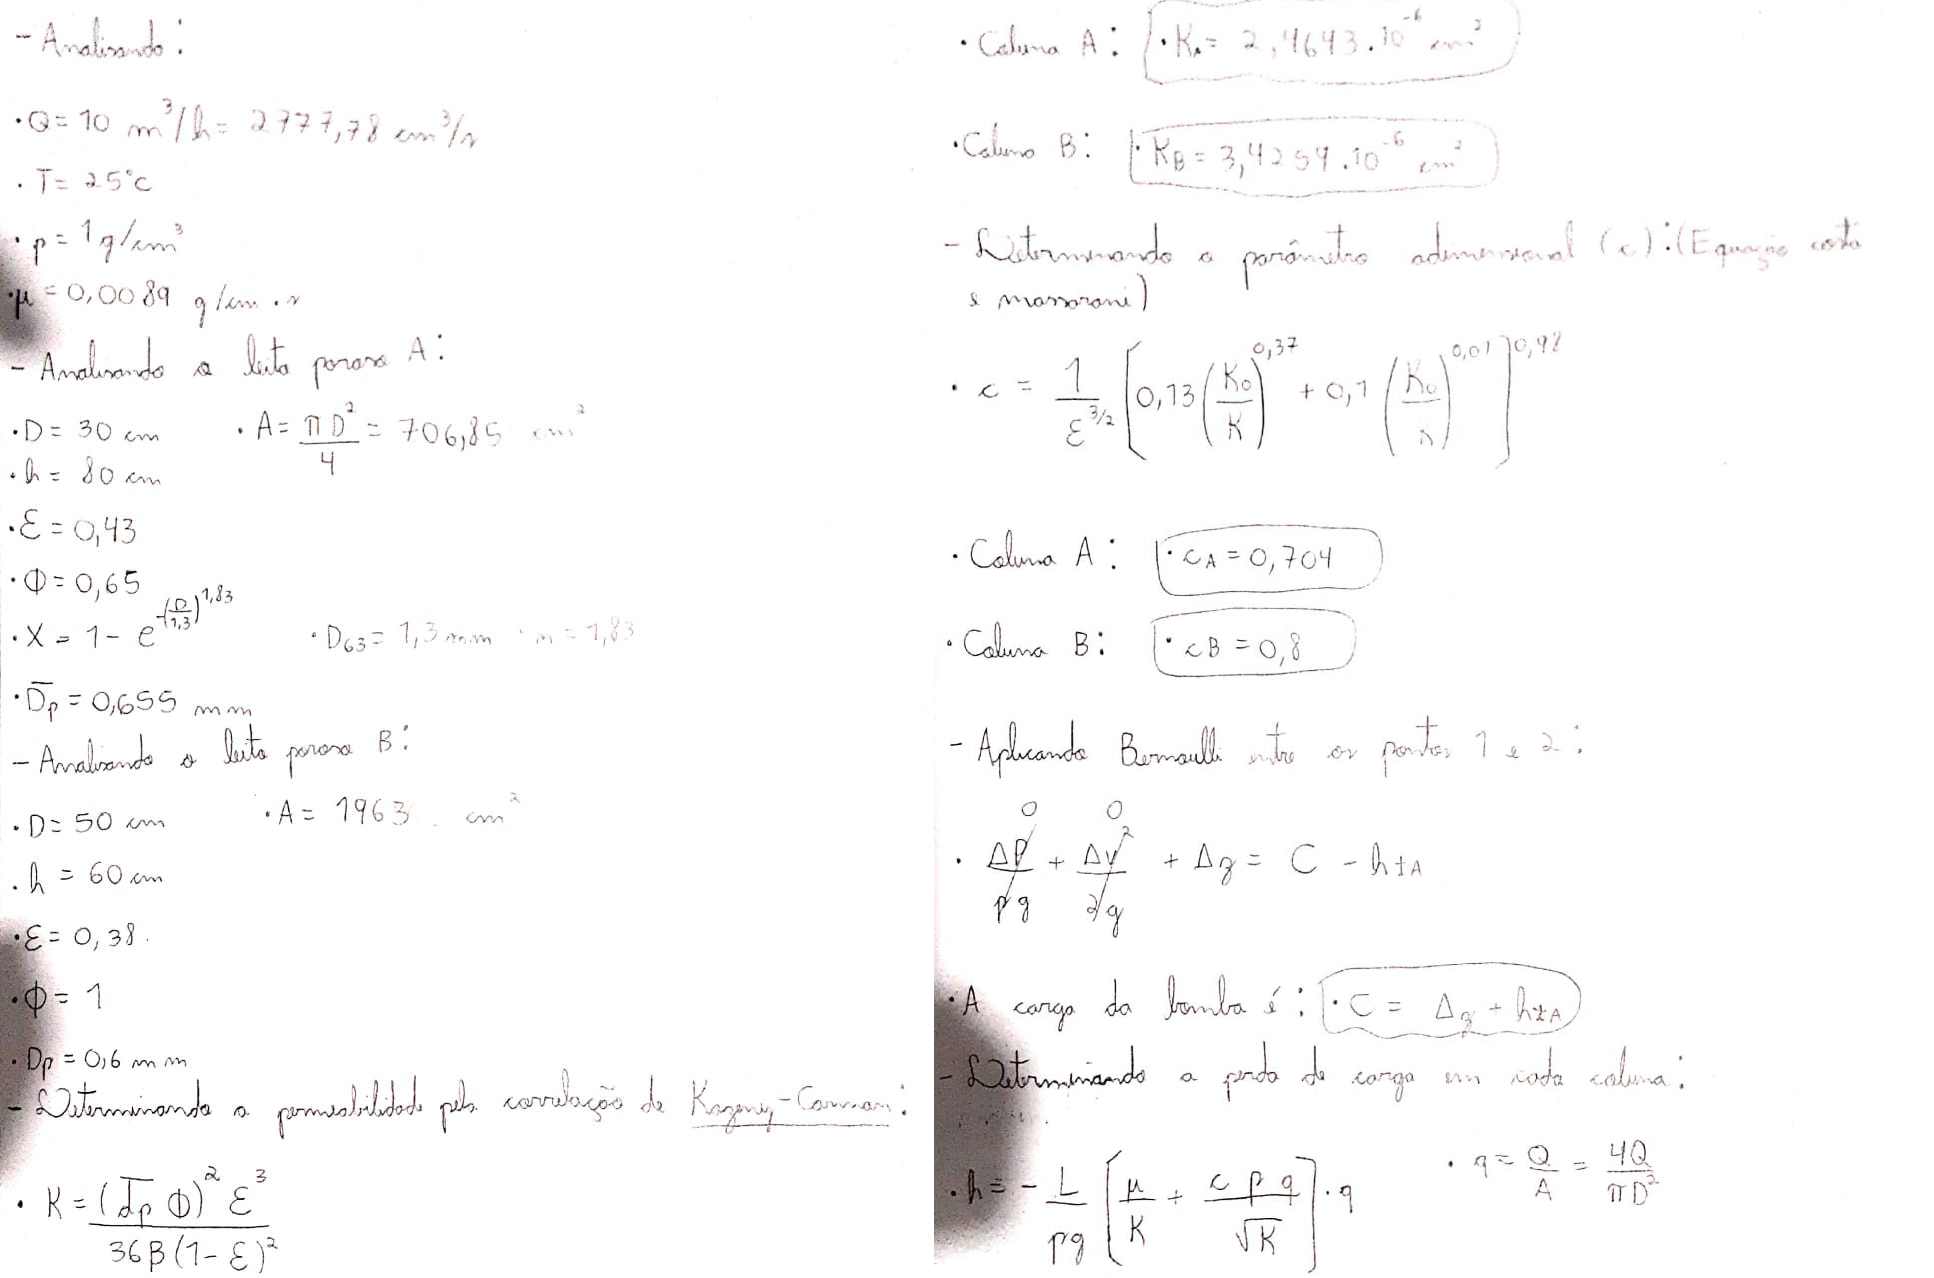
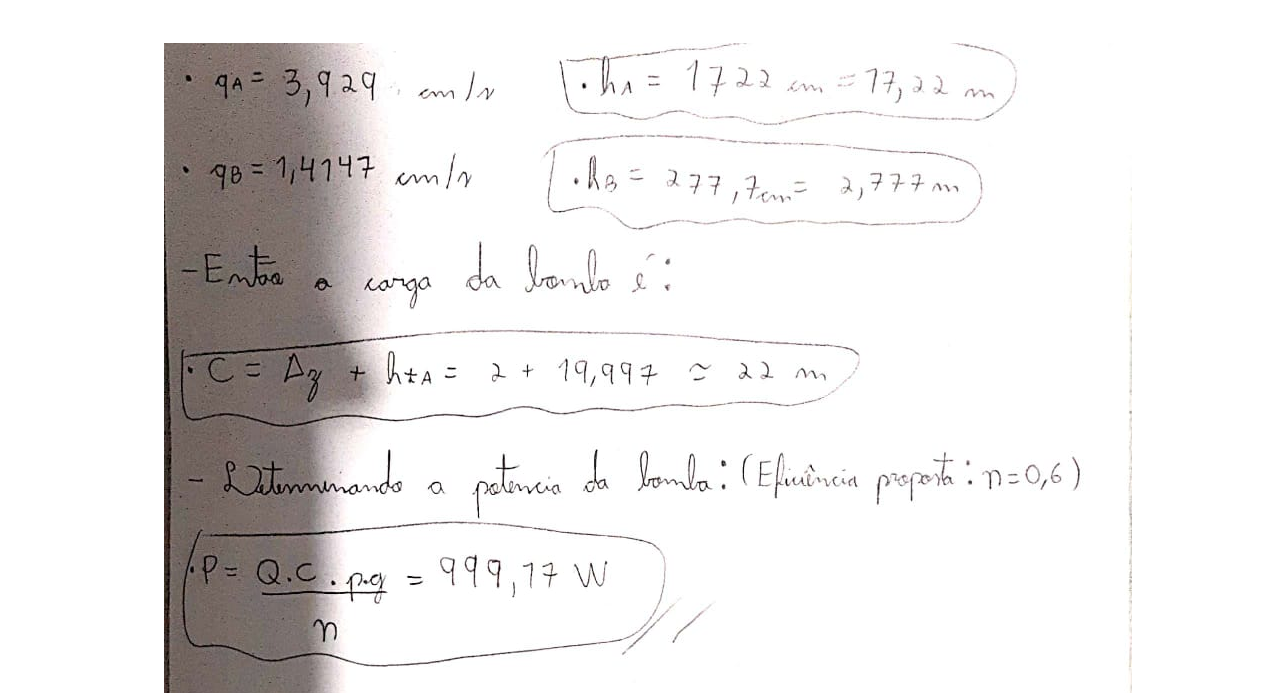

In [39]:
class Fluido:
    def __init__(self, p, visco, g):
        self.u = visco
        self.p = p
        self.g = g

class Coluna:
    def __init__(self, diametro_col, vazao, dp_medio, esfericidade, porosidade, fluido:Fluido):
        from math import pi
        
        # Coluna
        self.D = diametro_col
        self.A = pi*self.D**(2)/4
        self.Q = vazao
        self.q = self.Q/self.A
        
        # Fluido
        self.p = fluido.p
        self.g = fluido.g
        self.u = fluido.u
        
        # Particulas
        self.dp_medio = dp_medio
        self.esfericidade = esfericidade
        self.porosidade = porosidade
        if esfericidade != 1:
            self.permeabilidade = ((dp_medio*esfericidade)**2)*(porosidade**3)/(180*(1-porosidade)**2)
        else:
            self.permeabilidade = ((dp_medio*esfericidade)**2)*(porosidade**3)/(150*(1-porosidade)**2)
        
        # Calculando c
        dp = dp_medio
        esf = esfericidade
        por = porosidade
        k = self.permeabilidade
        ko = 1e-6
        t1 = 1/(por**(3/2))
        t2 = (ko/k)
        t3 = 0.13*t2**(0.37) + 0.1*t2**(0.01)
        self.c = t1*t3**(0.98)
        
        
    def perda_de_carga(self, L):
        from math import sqrt
        u = self.u
        p = self.p
        g = self.g
        c = self.c
        q = self.q
        k = self.permeabilidade
        t1 = L/(p*g)
        t2 = u/k
        t3 = (c*p*q)/(sqrt(k))
        self.h = t1*(t2 + t3)*q
        
        
    
    def view_K(self):
        print("k =", self.permeabilidade)
        print("c =", self.c)
        print("A =", self.A)
        print("q =", self.q)
        print("h =", self.h)
        print()

agua = Fluido(1, 0.0089, 981)

vazao = 2777.78
    
dp = 0.0655 # cm
esf = 0.65
poro = 0.43
dim_col = 30
coluna_A = Coluna(dim_col, vazao, dp, esf, poro, agua); coluna_A.perda_de_carga(80)
coluna_A.view_K()

dp = 0.06 # cm
esf = 1
poro = 0.38
dim_col = 50
coluna_B = Coluna(dim_col, vazao, dp, esf, poro, agua); coluna_B.perda_de_carga(60)
coluna_B.view_K()

k = 2.464293681848688e-06
c = 0.7045509697180263
A = 706.8583470577034
q = 3.929754825082712
h = 1722.6220573112257

k = 3.4259313215400624e-06
c = 0.8004416219459762
A = 1963.4954084936207
q = 1.4147117370297762
h = 277.7189102737024



1.0